In [1]:
from world import World 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import itertools as it

In [2]:
world = World(state_size = 5, time = 100, agent=["model_alt", "model_alt"], memory=[1, 1], behav_control=[1, 1])
world.create_agents()
world.run()
agents = world.get_agents()
errors = world.get_errors()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
world.print_results()
time = [t for t in range(len(costs[0]))]

world_pred and world
[0.276 0.721 0.717 0.813 0.224]
[0 0 0 1 1]
dif:
[-1.739 -1.824  0.251  1.689 -0.644]
sigmoid:
[0.14944    0.1389546  0.56242262 0.8440926  0.34434289]
prior update:
[0.94  0.597 0.14  0.607 0.056]
[0.36314667 0.2453182  0.23414087 0.48369753 0.13344763]
---
world_pred and world
[0.877 0.489 0.661 0.736 0.851]
[1 1 1 0 0]
dif:
[ 0.15  -0.52  -1.708  0.275 -0.908]
sigmoid:
[0.53742985 0.37285223 0.1534233  0.56831998 0.28740927]
prior update:
[0.567 0.074 0.031 0.734 0.845]
[0.36814328 0.14895074 0.06147443 0.43410666 0.37746976]
---
world_pred and world
[0.16678934 0.42595327 0.42331929 0.55092803 0.20314782]
[1 0 0 0 1]
dif:
[-1.04277634 -0.75785972 -1.8599251  -1.01065254 -1.71867913]
sigmoid:
[0.26061465 0.31911112 0.13471178 0.26685217 0.15204138]
prior update:
[0.36314667 0.2453182  0.23414087 0.48369753 0.13344763]
[0.15594033 0.14110733 0.09221316 0.18763743 0.07137225]
---
world_pred and world
[0.5888883  0.36789059 0.46446146 0.43594003 0.52006419]
[1 0 0 

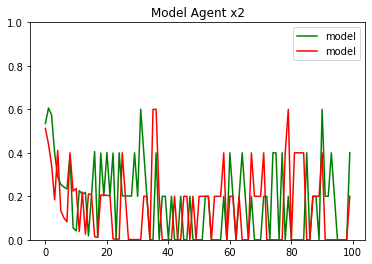

In [3]:
plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Model Agent x2")
plt.show()